In [1]:
!curl -O https://lazyprogrammer.me/course_files/airline_passengers.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2036  100  2036    0     0   5623      0 --:--:-- --:--:-- --:--:--  5639


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm

In [3]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
df['LogPassengers'] = np.log(df['Passengers'])
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [5]:
model = pm.auto_arima(
    train['Passengers'],
    trace=True,
    suppress_warnings=True,
    seasonal=True, m=12
)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.33 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.24 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.23 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.04 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=0.82 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.24 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.87 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.48 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.35 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.06 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.26 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Wed, 22 Nov 2023   AIC                            905.686
Time:                                    14:45:11   BIC                            919.623
Sample:                                01-01-1949   HQIC                           911.346
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095      7.393      0.000       0.518       0.892
ar.L2          0.2574      0.131      1.968      0.049       0.001       0.514
ar.L3         -0.1434      0.107     -1.338      0.181      -0.354       0.067
sigma2       101.0969     12.818      7.887      0.000      75.974     126.220
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.96   Prob(JB):                         0.24
Heteroskedasticity (H):               1.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [6]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

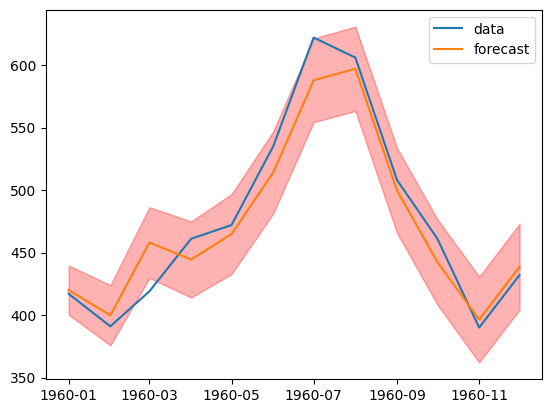

In [8]:
fig, ax = plt.subplots()
ax.plot(test.index, test['Passengers'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index,
                confint[:,0], confint[:,1],
                color='red', alpha=0.3)
ax.legend();

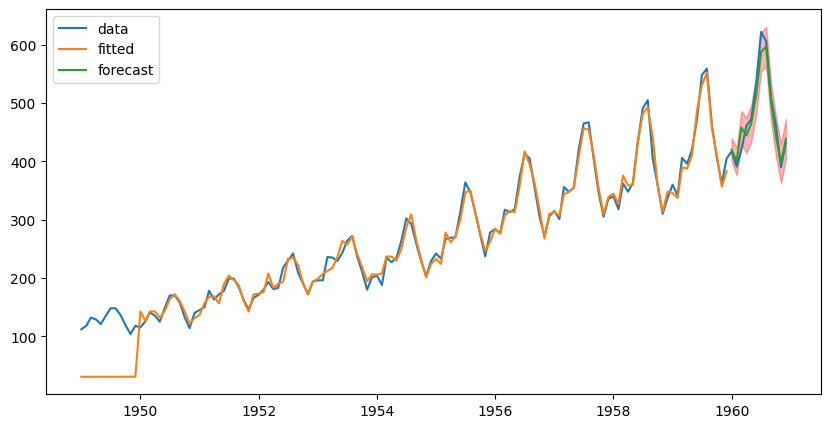

In [9]:
train_pred = model.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df['Passengers'], label='data')
ax.plot(train.index, train_pred, label='fitted')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

In [10]:
# Train another model on log of passengers
logmodel = pm.auto_arima(train['LogPassengers'],
                      trace=True,
                      suppress_warnings=True,
                      seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-438.254, Time=0.95 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-317.949, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-433.027, Time=0.78 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-383.189, Time=0.52 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-134.983, Time=0.02 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=-444.326, Time=1.61 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=-414.782, Time=0.47 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=-442.330, Time=2.59 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=-436.680, Time=1.39 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=3.55 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-445.574, Time=1.18 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=-414.732, Time=0.37 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=-443.273, Time=1.24 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=-443.344, Time=2.19 sec
 ARIMA(1,0,2)(1,1,0)[12]

In [11]:
logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 229.026
Date:                              Wed, 22 Nov 2023   AIC                           -448.052
Time:                                      14:51:04   BIC                           -434.114
Sample:                                  01-01-1949   HQIC                          -442.392
                                       - 12-01-1959                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0192      0.009      2.150      0.032       0.002       0.037
ar.L1          0.6007      0.083      7.280      0.000       0.439       0.762
ar.L2          0.2417      0.085      2.854      0.004       0.076       0.408
ma.S.L12      -0.5670      0.105     -5.418      0.000      -0.772      -0.362
sigma2         0.0012      0.000      8.193      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.06
Prob(Q):                              0.99   Prob(JB):                         0.05
Heteroskedasticity (H):               0.36   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

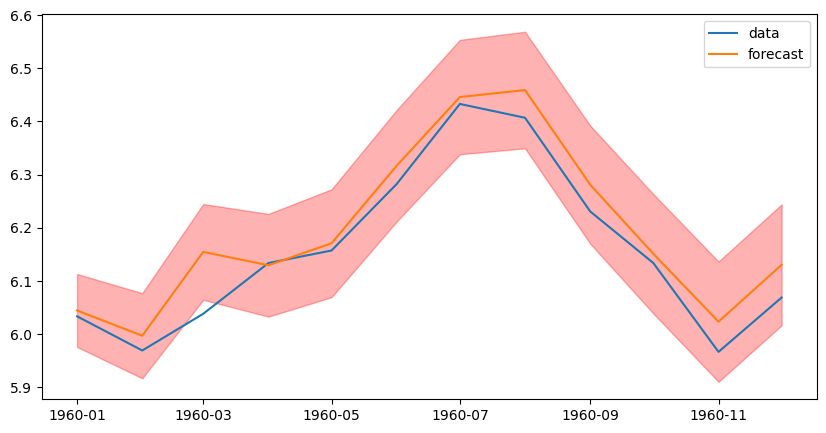

In [12]:
test_pred_log, confint = logmodel.predict(n_periods=Ntest, return_conf_int=True)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test['LogPassengers'], label='data')
ax.plot(test.index, test_pred_log, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

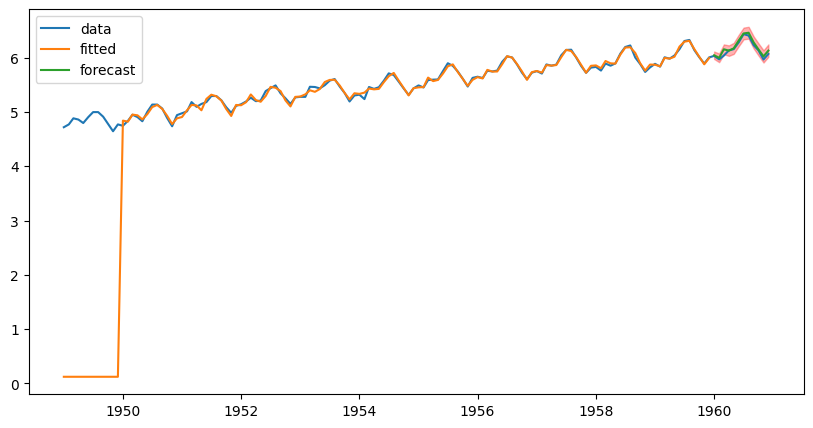

In [13]:
train_pred_log = logmodel.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df['LogPassengers'], label='data')
ax.plot(train.index, train_pred_log, label='fitted')
ax.plot(test.index, test_pred_log, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

In [14]:
### forecast RMSE
def rmse(t, y):
  return np.sqrt(np.mean((t - y)**2))

In [15]:
print("Non-logged RMSE:", rmse(test['Passengers'], test_pred))
print("Logged RMSE:", rmse(test['Passengers'], np.exp(test_pred_log)))

Non-logged RMSE: 18.536469014046745
Logged RMSE: 23.03129977633835


In [16]:
# Train a non-seasonal model
non_seasonal_model = pm.auto_arima(
    train['LogPassengers'],
    trace=True,
    suppress_warnings=True,
    d=0, max_p=12, max_q=2, max_order=14,
    stepwise=False,
    seasonal=False
)

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=826.758, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-209.510, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-211.836, Time=0.26 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-209.641, Time=0.20 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-207.056, Time=0.32 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.34 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-206.409, Time=0.29 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-211.090, Time=0.30 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=inf, Time=0.29 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.34 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=0.39 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=inf, Time

In [18]:
non_seasonal_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:              SARIMAX(12, 0, 2)   Log Likelihood                 167.379
Date:                Wed, 22 Nov 2023   AIC                           -304.757
Time:                        14:54:19   BIC                           -261.515
Sample:                    01-01-1949   HQIC                          -287.186
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0366      0.078      0.467      0.641      -0.117       0.190
ar.L2          0.1768      0.096      1.844      0.065      -0.011       0.365
ar.L3          0.1314      0.097      1.357      0.175      -0.058       0.321
ar.L4         -0.1259      0.078     -1.619      0.105      -0.278       0.026
ar.L5          0.0366      0.076      0.482      0.630      -0.112       0.185
ar.L6          0.0862      0.081      1.063      0.288      -0.073       0.245
ar.L7         -0.0053      0.084     -0.063      0.950      -0.171       0.160
ar.L8         -0.0946      0.085     -1.116      0.264      -0.261       0.072
ar.L9         -0.0481      0.078     -0.619      0.536      -0.200       0.104
ar.L10         0.0982      0.071      1.376      0.169      -0.042       0.238
ar.L11        -0.0642      0.079     -0.817      0.414      -0.218       0.090
ar.L12         0.7721      0.079      9.763      0.000       0.617       0.927
ma.L1          0.9375      0.097      9.620      0.000       0.747       1.129
ma.L2          0.6251      0.083      7.500      0.000       0.462       0.788
sigma2         0.0037      0.001      6.986      0.000       0.003       0.005
===================================================================================
Ljung-Box (L1) (Q):                   3.05   Jarque-Bera (JB):                 1.31
Prob(Q):                              0.08   Prob(JB):                         0.52
Heteroskedasticity (H):               0.51   Skew:                             0.23
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

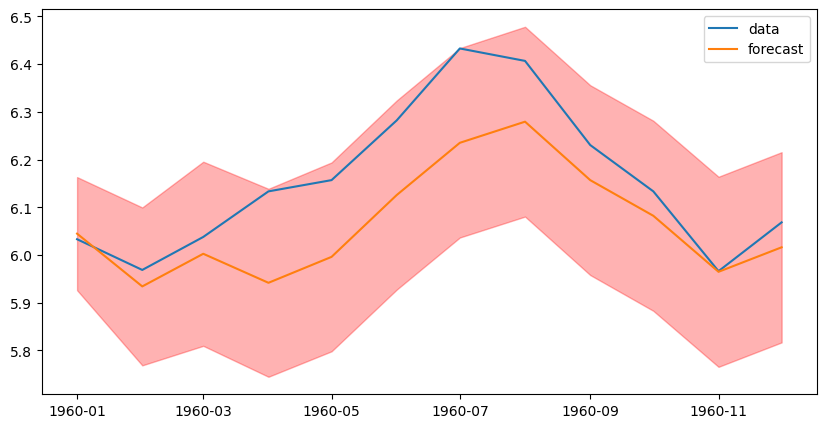

In [20]:
test_pred, confint = non_seasonal_model.predict(n_periods=Ntest, return_conf_int=True)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test['LogPassengers'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

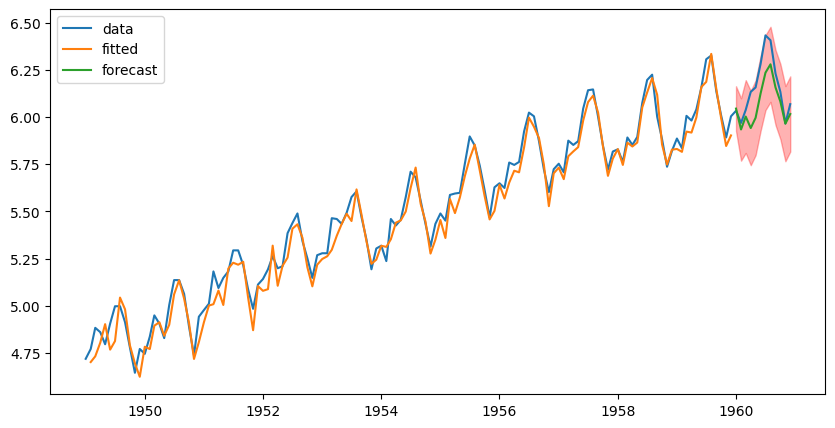

In [22]:
train_pred = non_seasonal_model.predict_in_sample(start=1, end=-1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df['LogPassengers'], label='data')
ax.plot(train.index[1:], train_pred, label='fitted')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

In [23]:
rmse(test['Passengers'], np.exp(test_pred))

56.14129773110328

Use Auto SARIMA in stock price prediction

In [24]:
!curl -O https://lazyprogrammer.me/course_files/sp500sub.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 11 24.2M   11 2830k    0     0  1691k      0  0:00:14  0:00:01  0:00:13 1691k
 14 24.2M   14 3678k    0     0  1436k      0  0:00:17  0:00:02  0:00:15 1436k
 27 24.2M   27 6766k    0     0  1899k      0  0:00:13  0:00:03  0:00:10 1898k
 38 24.2M   38 9646k    0     0  2117k      0  0:00:11  0:00:04  0:00:07 2117k
100 24.2M  100 24.2M    0     0  4664k      0  0:00:05  0:00:05 --:--:-- 5206k


In [57]:
import pmdarima as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

df = pd.read_csv('sp500sub.csv', index_col='Date', parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


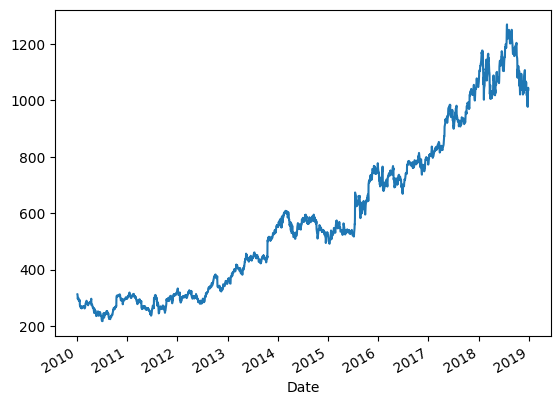

In [58]:
goog = df[df['Name'] == 'GOOG']['Close']
goog.plot();

In [59]:
Ntest = 30
train = goog.iloc[:-Ntest]
test = goog.iloc[-Ntest:]
model = pm.auto_arima(
    train,
    error_action='ignore',
    trace=True,
    suppress_warnings=True,
    maxiter=10, seasonal=False
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16270.771, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16270.383, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16269.726, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16269.492, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16271.123, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16268.077, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=16267.935, Time=0.23 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=16268.277, Time=0.16 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=16266.968, Time=0.27 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=16264.983, Time=0.24 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=16266.925, Time=0.35 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=16268.907, Time=0.48 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=16265.470, Time=0.11 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0] intercept
Total fit time: 2.652 seconds


In [60]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(3, 1, 0)   Log Likelihood               -8127.491
Date:                Thu, 23 Nov 2023   AIC                          16264.983
Time:                        14:14:44   BIC                          16293.536
Sample:                             0   HQIC                         16275.409
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3104      0.198      1.571      0.116      -0.077       0.698
ar.L1          0.0378      0.012      3.152      0.002       0.014       0.061
ar.L2         -0.0410      0.013     -3.241      0.001      -0.066      -0.016
ar.L3          0.0488      0.012      4.031      0.000       0.025       0.073
sigma2        85.1623      1.033     82.421      0.000      83.137      87.187
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             11790.07
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               6.78   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [61]:
model.get_params()

{'maxiter': 10,
 'method': 'lbfgs',
 'order': (3, 1, 0),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

In [62]:
def plot_result(model, fulldata, train, test):
    params = model.get_params()
    d = params['order'][1]
    train_pred = model.predict_in_sample(start=d, end=-1)
    test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)
    
    fig, ax = plt.subplots()
    ax.plot(fulldata.index, fulldata, label='data')
    ax.plot(train.index[d:], train_pred, label='fitted')
    ax.plot(test.index, test_pred, label='forecast')
    ax.fill_between(test.index, confint[:, 0], confint[:, 1], color='red', alpha=0.3)
    ax.legend();

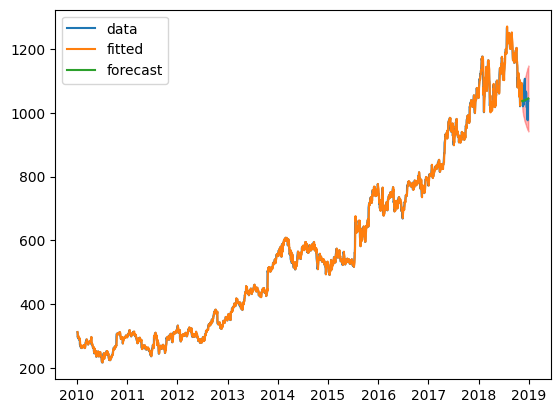

In [63]:
plot_result(model, goog, train, test)

In [64]:
def plot_test(model, test):
    test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)
    fig, ax = plt.subplots()
    ax.plot(test.index, test, label='true')
    ax.plot(test.index, test_pred, label='forecast')
    ax.fill_between(test.index, confint[:, 0], confint[:, 1],
                    color='red', alpha=0.3)
    ax.legend();

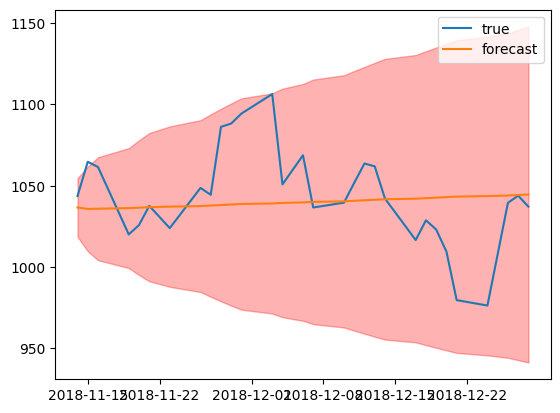

In [65]:
plot_test(model, test)

In [66]:
def rmse(pred, true):
    return np.sqrt(np.mean((pred- true.values) ** 2))

In [67]:
print("RMSE ARIMA:", rmse(model.predict(Ntest), test))
print("RMSE Naive:", rmse(train.iloc[-1], test))

RMSE ARIMA: 30.436602011716605
RMSE Naive: 30.029502477261467


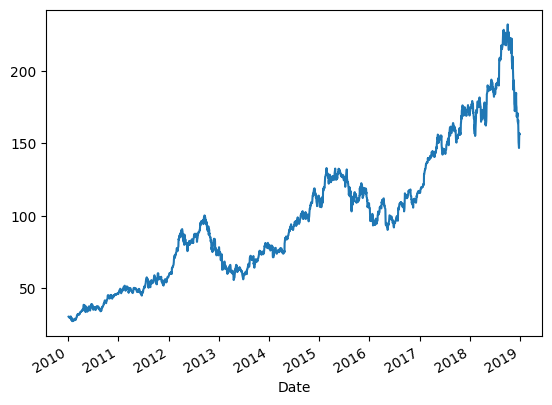

In [69]:
# Analyze Apple stock price
aapl = df[df['Name'] == 'AAPL']['Close']
aapl.plot();

In [70]:
train = aapl.iloc[:-Ntest]
test = aapl.iloc[-Ntest:]
model = pm.auto_arima(
    train, error_action='ignore', trace=True,
    suppress_warnings=True, maxiter=10,
    seasonal=False
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8570.296, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8575.329, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8574.709, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8574.392, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8577.622, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8571.650, Time=0.38 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8571.332, Time=0.44 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=8572.500, Time=0.59 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=8572.527, Time=0.65 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8574.574, Time=0.34 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=8570.852, Time=0.62 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8570.880, Time=0.54 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=8579.289, Time=0.67 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=8572.973, Time=0.24 sec

Best model:  ARIMA(2,1,2)(0,0,0)

In [71]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -4279.148
Date:                Thu, 23 Nov 2023   AIC                           8570.296
Time:                        14:17:38   BIC                           8604.560
Sample:                             0   HQIC                          8582.808
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0803      0.042      1.896      0.058      -0.003       0.163
ar.L1          0.3755      0.165      2.279      0.023       0.053       0.699
ar.L2         -0.4239      0.176     -2.407      0.016      -0.769      -0.079
ma.L1         -0.3433      0.172     -2.002      0.045      -0.679      -0.007
ma.L2          0.3579      0.183      1.958      0.050      -0.000       0.716
sigma2         2.7182      0.039     69.453      0.000       2.642       2.795
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              6223.04
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               4.23   Skew:                            -0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

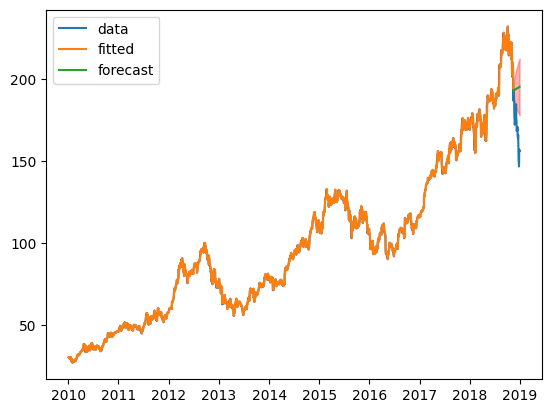

In [72]:
plot_result(model, aapl, train, test)

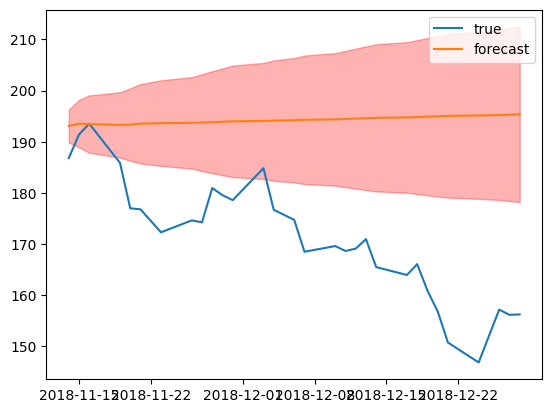

In [73]:
plot_test(model, test)

In [74]:
print("RMSE ARIMA:", rmse(model.predict(Ntest), test))
print("RMSE Naive:", rmse(train.iloc[-1], test))

RMSE ARIMA: 26.094960080652257
RMSE Naive: 24.02712058667382


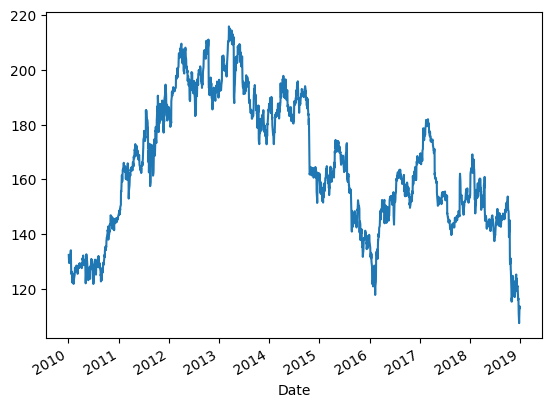

In [75]:
# IBM data
ibm = df[df['Name'] == 'IBM']['Close']
# ibm = np.log(df[df['Name'] == 'IBM']['Close'])
ibm.plot();

In [77]:
train = ibm.iloc[:-Ntest]
test = ibm.iloc[-Ntest:]
model = pm.auto_arima(
    train, error_action='ignore', trace=True,
    suppress_warnings=True, maxiter=10,
    seasonal=False
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9442.954, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9436.082, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9437.603, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9437.589, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9434.097, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9439.637, Time=0.17 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.740 seconds


In [78]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -4716.049
Date:                Thu, 23 Nov 2023   AIC                           9434.097
Time:                        14:19:16   BIC                           9439.808
Sample:                             0   HQIC                          9436.183
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         4.0067      0.055     72.559      0.000       3.898       4.115
===================================================================================
Ljung-Box (L1) (Q):                   0.48   Jarque-Bera (JB):              5352.76
Prob(Q):                              0.49   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                            -0.77
Prob(H) (two-sided):                  0.03   Kurtosis:                        10.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

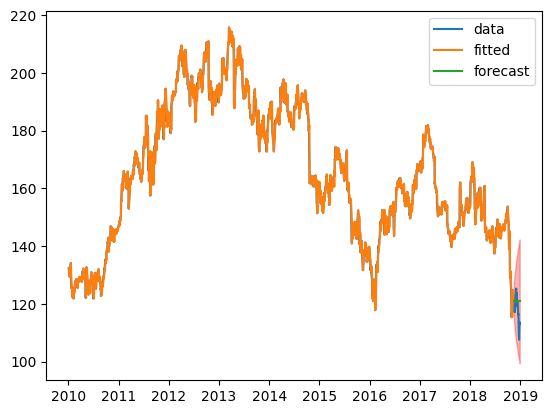

In [79]:
plot_result(model, ibm, train, test)

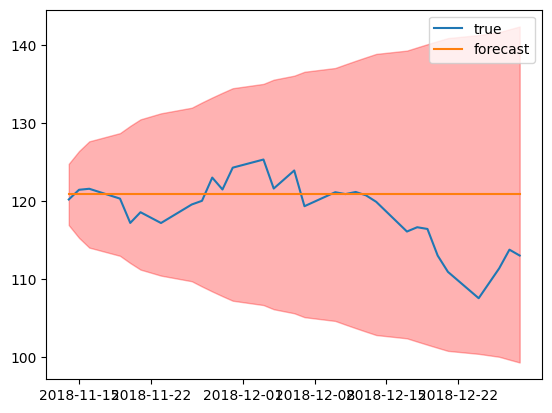

In [80]:
plot_test(model, test)

In [81]:
print("RMSE ARIMA:", rmse(model.predict(Ntest), test))
print("RMSE Naive:", rmse(train.iloc[-1], test))

RMSE ARIMA: 4.763157130051095
RMSE Naive: 4.763157130051095


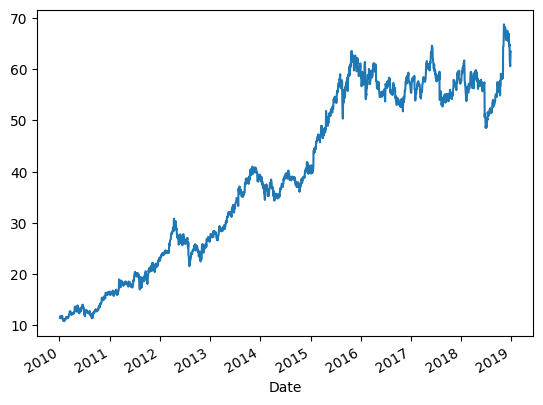

In [82]:
# SBUX data
sbux = df[df['Name'] == 'SBUX']['Close']
sbux.plot();

In [83]:
train = sbux.iloc[:-Ntest]
test = sbux.iloc[-Ntest:]
model = pm.auto_arima(
    train, error_action='ignore', trace=True,
    suppress_warnings=True, maxiter=10,
    seasonal=False
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3858.919, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3851.895, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3853.862, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3853.860, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3854.154, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3855.861, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.711 seconds


In [84]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1923.948
Date:                Thu, 23 Nov 2023   AIC                           3851.895
Time:                        14:20:31   BIC                           3863.317
Sample:                             0   HQIC                          3856.066
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0250      0.012      2.048      0.041       0.001       0.049
sigma2         0.3283      0.003     94.371      0.000       0.321       0.335
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             18901.16
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               3.80   Skew:                            -0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

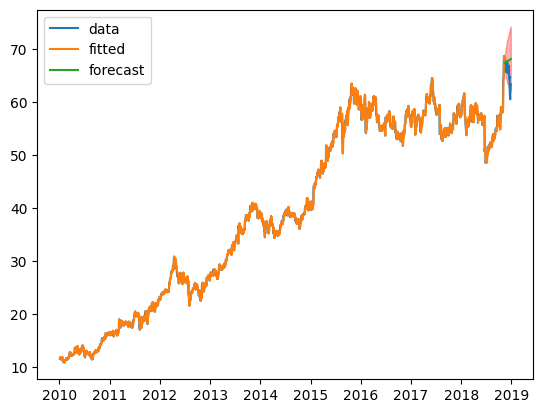

In [85]:
plot_result(model, sbux, train, test)

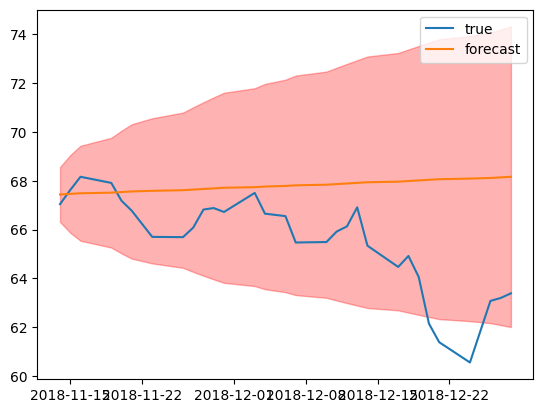

In [86]:
plot_test(model, test)

In [87]:
print("RMSE ARIMA:", rmse(model.predict(Ntest), test))
print("RMSE Naive:", rmse(train.iloc[-1], test))

RMSE ARIMA: 3.094903477837591
RMSE Naive: 2.6889385763409135
